# Sales Data Analysis with Python

## Restaurant Sales Dataset
***
Here, 

I have the sales data of a restaurant company from different cities (countries).

This data is available in Excel file format. I am going to analyze and visualize this data.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [74]:
data=pd.read_excel(r"E:\jn\Sales-Data-Analysis.xlsx",header=1)

In [75]:
data.head(2)

,Unnamed: 0,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,NaN,10452,2022-11-07,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
1,NaN,10453,2022-11-07,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid


# Drop Unwanted column

In [76]:
data.drop(columns=["Unnamed: 0"],inplace=True)

In [77]:
data.head(3)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-11-07,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
1,10453,2022-11-07,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-11-07,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon


# Consider the Manager column

In [78]:
data.Manager

0        Tom      Jackson
1             Pablo Perez
2           Joao    Silva
3           Walter Muller
4           Walter Muller
              ...        
249         Walter Muller
250         Walter Muller
251         Walter Muller
252         Walter Muller
253         Walter Muller
Name: Manager, Length: 254, dtype: object

In [79]:
data.Manager.unique()

array(['Tom      Jackson', '       Pablo Perez', 'Joao    Silva',
       'Walter Muller', 'Remy    Monet', 'Remy Monet',
       '       Remy Monet', 'Remy     Monet', 'Pablo Perez',
       'Pablo   Perez', 'Pablo  Perez', 'Pablo    Perez', 'Joao Silva',
       'Tom Jackson'], dtype=object)

In [80]:
data.Manager.nunique()

14

In [81]:
# to remove extra spaces in names
data['Manager']=data['Manager'].str.strip().str.replace(r'\s+',' ',regex=True)

In [82]:
data.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-11-07,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
1,10453,2022-11-07,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid


In [84]:
data['Manager'].unique()

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [85]:
data['Manager'].nunique()

5

# Removing Duplicates record

In [86]:
data.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-11-07,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
1,10453,2022-11-07,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid


In [87]:
data.describe()

,Order ID,Date,Price,Quantity
count,254.000000,254,254.000000,254.000000
mean,10584.133858,2022-12-03 10:23:37.322834688,7.102323,460.610541
min,10452.000000,2022-11-07 00:00:00,2.950000,200.400802
25%,10520.250000,2022-11-21 00:00:00,3.490000,201.005025
50%,10583.500000,2022-12-03 00:00:00,4.990000,538.876059
75%,10649.750000,2022-12-16 18:00:00,9.950000,677.444188
max,10713.000000,2022-12-29 00:00:00,29.050000,754.426482
std,75.889181,NaN,4.341855,214.889551


In [95]:
data.duplicated().sum()

np.int64(0)

In [97]:
data['Order ID'].duplicated().sum()

np.int64(0)

# Converting the datatype of columns

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    float64       
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 18.0+ KB


In [99]:
data['Quantity']=data['Quantity'].astype(int)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    int64         
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 18.0+ KB


# Analyzing the Data:


# 1.Most Preferred Payment Method

In [101]:
data.head(3)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon


In [104]:
data['Payment Method'].unique()

array([' Gift Card', ' Credit Card', ' Cash'], dtype=object)

In [105]:
data['Payment Method'].nunique()

3

In [106]:
data['Payment Method'].value_counts()   

Payment Method
Credit Card    120
Cash            76
Gift Card       58
Name: count, dtype: int64

In [108]:
data['Payment Method'].value_counts(normalize=True)*100 #to get the result in percentage

Payment Method
Credit Card    47.244094
Cash           29.921260
Gift Card      22.834646
Name: proportion, dtype: float64

<Axes: xlabel='Payment Method'>

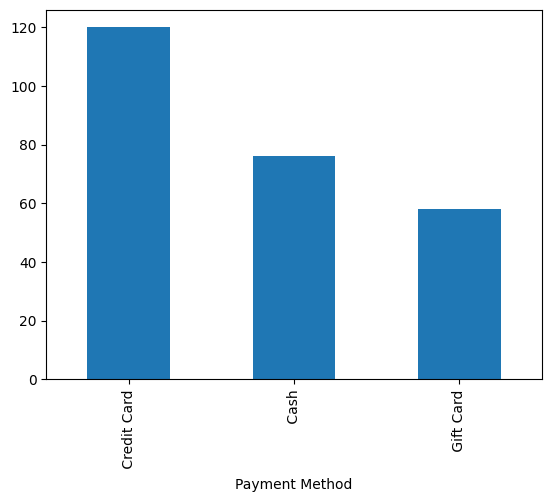

In [110]:
data['Payment Method'].value_counts().plot(kind='bar')

### 2.Most Selling Product
# ----By Quantity
# ----By Revenue

# By Quantity

In [111]:
data.head(3)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon


In [116]:
data.groupby("Product")["Quantity"].sum().reset_index()

,Product,Quantity
0,Beverages,34938
1,Burgers,28996
2,Chicken Sandwiches,11132
3,Fries,32016
4,Sides & Other,9800


In [118]:
most_quantity=data.groupby("Product")["Quantity"].sum().sort_values(ascending=False)

In [138]:
most_quantity=most_quantity.reset_index()

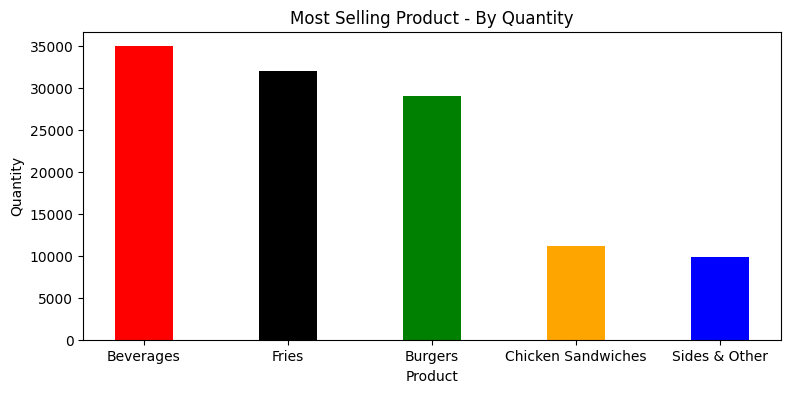

In [141]:
plt.figure(figsize = (9,4))
plt.bar(most_quantity['Product'], most_quantity['Quantity'], color = ['red', 'black', 'green', 'orange', 'Blue'], width=0.4)
plt.title("Most Selling Product - By Quantity")              
plt.xlabel("Product")
plt.ylabel("Quantity");

In [143]:
data["Revenue"]=data['Price']*data['Quantity']

In [145]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95
...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin,998.00
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70


In [147]:
most_revenue=data.groupby("Product")["Revenue"].sum().sort_values(ascending=False)

In [150]:
most_revenue=most_revenue.reset_index()

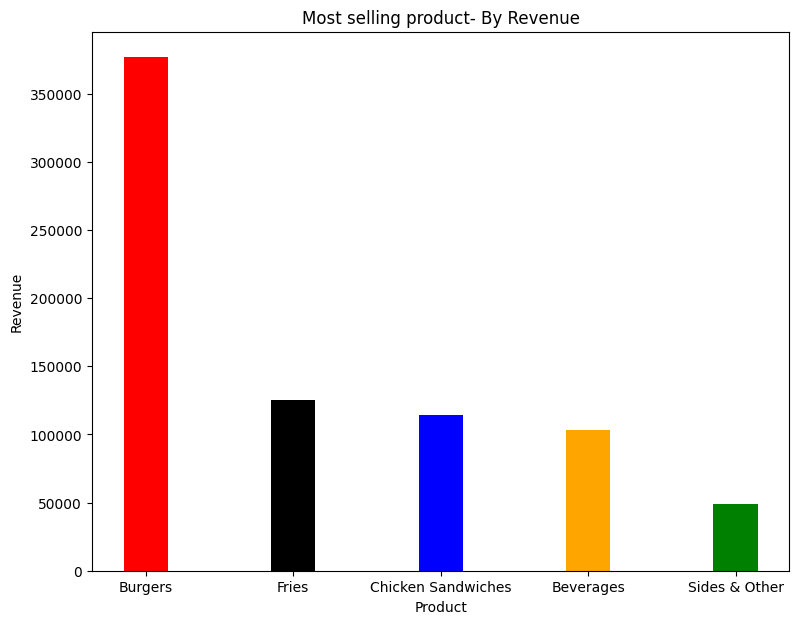

In [158]:
plt.figure(figsize=(9,7))
plt.bar(most_revenue["Product"],most_revenue["Revenue"],color=['red',"black","blue","orange","green"],width=0.3)
plt.title("Most selling product- By Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()

# 3. Which city have maximmum revenue
# or
# Which manager earned maximum revenue

In [159]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95


In [160]:
data['City'].unique()

array(['London', 'Madrid', 'Lisbon', 'Berlin', 'Paris'], dtype=object)

In [161]:
data['City'].nunique()

5

In [163]:
data.groupby("City")["Revenue"].sum().sort_values(ascending=False).reset_index()

,City,Revenue
0,Lisbon,241509.38
1,London,211001.83
2,Madrid,136098.22
3,Berlin,100492.73
4,Paris,79729.62


In [164]:
data["Manager"].unique()

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [165]:
data["Manager"].nunique()

5

In [167]:
data.groupby("Manager")["Revenue"].sum().sort_values(ascending=False).reset_index()

,Manager,Revenue
0,Joao Silva,241509.38
1,Tom Jackson,211001.83
2,Pablo Perez,136098.22
3,Walter Muller,100492.73
4,Remy Monet,79729.62


# 5. Date wise Revenue

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    int64         
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
 9   Revenue         254 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 20.0+ KB


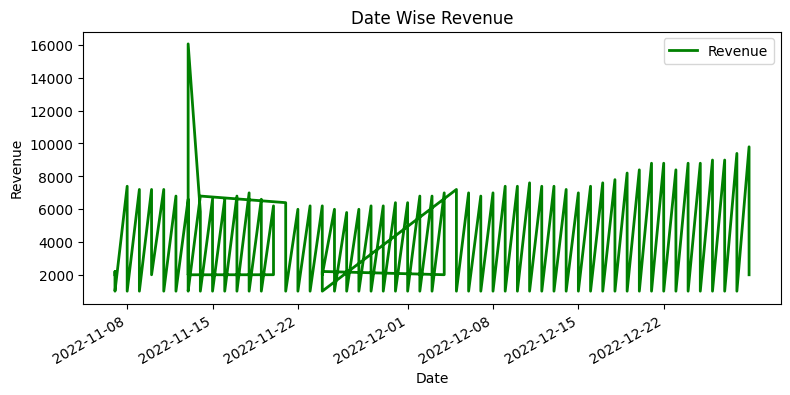

In [173]:
data.plot("Date","Revenue",color='Green',linewidth=2,figsize=(9,4))
plt.title("Date Wise Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

# 4. Average Revenue

In [174]:
data["Revenue"].mean()

np.float64(3026.8967716535435)

# 5.Average revenue of November and December month

In [177]:
data["Month"]=data["Date"].dt.month_name()

In [178]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,November
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75,November
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,November
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31,November
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,November
...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin,998.00,December
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46,December
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95,December
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70,December


In [183]:
November=data[data["Month"]=='November']

In [184]:
November["Revenue"].mean()

np.float64(2936.6534513274337)

In [185]:
December=data[data["Month"]=='December']

In [186]:
December["Revenue"].mean()

np.float64(3099.2194326241133)

# 7. Standard Deviation of Revenue & Quantity

In [187]:
data["Revenue"].std()

np.float64(2418.193128210548)

In [188]:
data["Quantity"].std()

np.float64(214.69197583196453)

# 8.Variance of Revenue and Quantity

In [189]:
data["Revenue"].var()

np.float64(5847658.005324715)

In [190]:
data["Quantity"].var()

np.float64(46092.644486632846)

# 9. Is Revenue increasing or decreasing over time?

In [191]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,November
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75,November
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,November
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31,November
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,November


In [192]:
November["Revenue"].sum()

np.float64(331841.84)

In [193]:
December["Revenue"].sum()

np.float64(436989.94)

# 10.Average "Quantity Sold" and "Average Revenue" for each Product


In [198]:
data.groupby("Product")[["Quantity","Revenue"]].agg({"Quantity":"mean","Revenue":"mean"})

,Quantity,Revenue
Product,,
Beverages,698.760000,2061.342000
Burgers,557.615385,7243.423846
Chicken Sandwiches,214.076923,2203.894231
Fries,627.764706,2462.787059
Sides & Other,200.000000,998.000000
